In [1]:

import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import torch
import math
import networkx as nx
from tqdm import tqdm
from PIL import Image
from crp.image import imgify, vis_opaque_img, plot_grid

In [17]:
from expbasics.nmf import sample_cavs, nmf, nearest_neighbors, vis_nearest_neighbors, load_cavs, sample_relevance_cavs
from expbasics.helper import get_attributions, get_model_etc, to_name
from expbasics.visualizations import plot_nmfs


%reload_ext autoreload
%autoreload 2

In [26]:
BIAS = 0.97
NUM_IT = 0
MODEL_NAME = to_name(BIAS, NUM_IT)
model, gm, crp_attribution, unbiased_ds, test_loader = get_model_etc(BIAS, NUM_IT)


In [20]:
BATCH_SIZE = 256 # 128
N_BASIS = 4
BATCH_STEP_SIZE = 256
NUM_NEIGHBORS = 36
SPATIAL_STEPSIZE = 7
LAYER_NAME = "convolutional_layers.6" #"linear_layers.1"#
# sample activations:
#sample_cavs(model, unbiased_ds, LAYER_NAME, SPATIAL_STEPSIZE, BATCH_STEP_SIZE, BATCH_SIZE, model_name)
sample_relevance_cavs(model, unbiased_ds, LAYER_NAME, SPATIAL_STEPSIZE, BATCH_STEP_SIZE, BATCH_SIZE, crp_attribution, model_name)
cavs, idx = load_cavs(LAYER_NAME, MODEL_NAME)
H = nmf(cavs, N_BASIS)
H = torch.tensor(H)
print(H.shape)

nn_idx = nearest_neighbors(H, cavs, idx, NUM_NEIGHBORS, "cosine")  # , "cosine"
for i in range(N_BASIS):
    vis_nearest_neighbors(unbiased_ds, nn_idx[i], f"{LAYER_NAME}_cosine_{i}")

Computing CAVs: 100%|██████████| 960/960 [00:50<00:00, 18.97batch/s]


torch.Size([4, 8])


/home/lilli/.local/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 400 reached. Increase it to improve convergence.
  warnings.warn(
/home/lilli/Desktop/MASTER/code/experiments/expbasics/nmf.py:173: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  H = torch.tensor(H, dtype=torch.float32)


In [21]:
cond_layer = "convolutional_layers.6"#"linear_layers.0" #

t = torch.zeros((N_BASIS, NUM_NEIGHBORS, 64, 64))
told = torch.zeros((N_BASIS, NUM_NEIGHBORS, 64, 64))
originals = torch.zeros((N_BASIS, NUM_NEIGHBORS, 64, 64))
for i in range(N_BASIS):
    for index in range(NUM_NEIGHBORS):
        hold, pred = crp_attribution.heatmap(nn_idx[i][index])
        h = crp_attribution.cav_heatmap(nn_idx[i][index], cond_layer, H[i])
        originals[i][index] = crp_attribution.dataset[nn_idx[i][index]][0][0]
        t[i][index] = h
        told[i][index] = hold

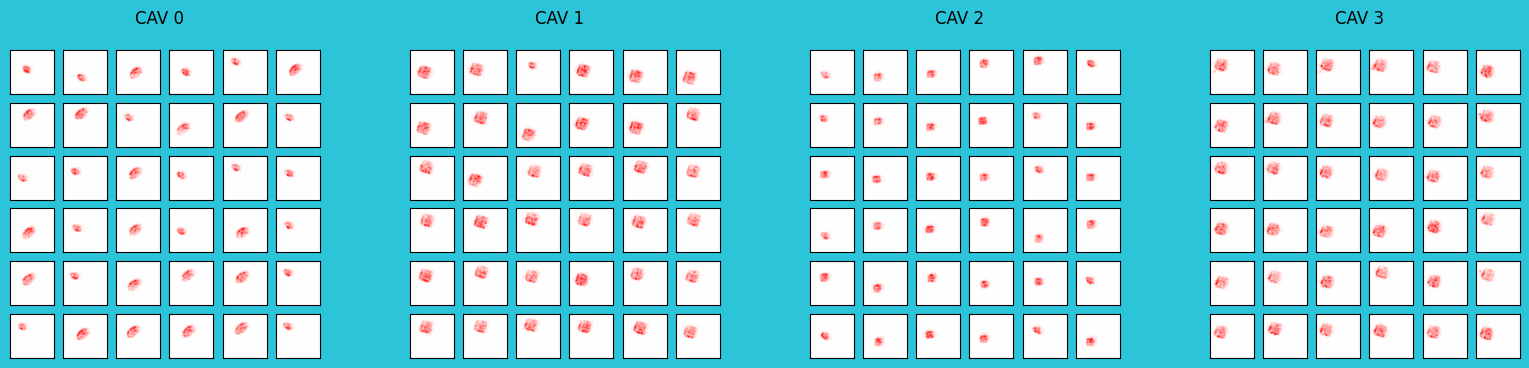

In [22]:
plot_nmfs(t, NUM_NEIGHBORS, N_BASIS)

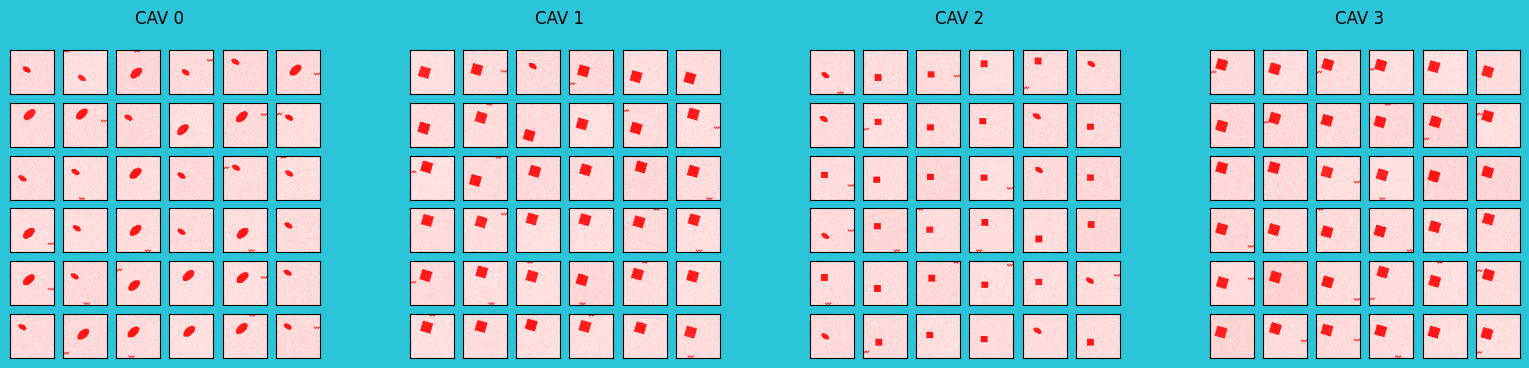

In [23]:
plot_nmfs(originals, NUM_NEIGHBORS, N_BASIS) # NUM_NEIGHBORS, N_BASIS

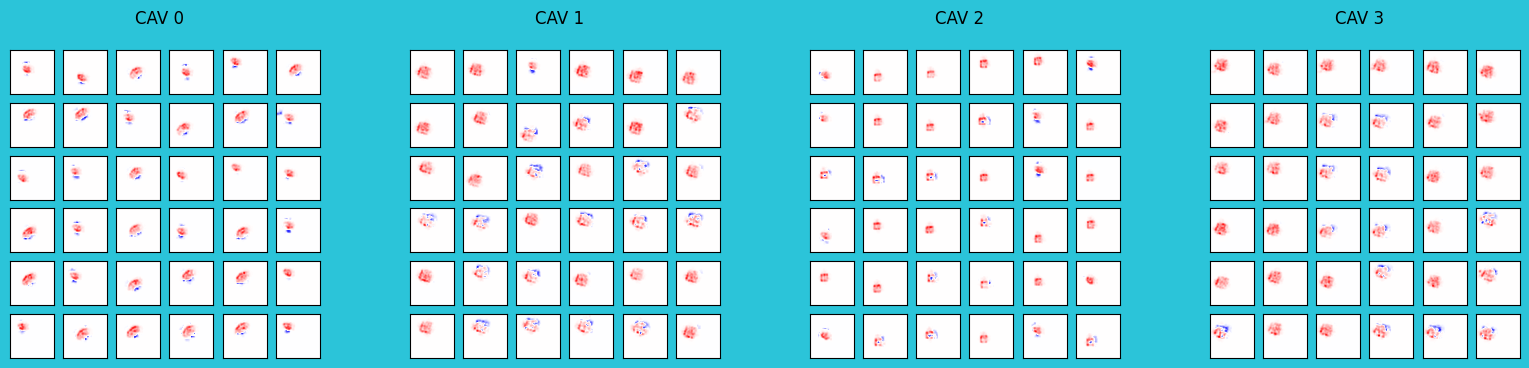

In [24]:
plot_nmfs(told, NUM_NEIGHBORS, N_BASIS)

/home/lilli/miniconda3/envs/mt/lib/python3.10/site-packages/crp/image.py:288: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


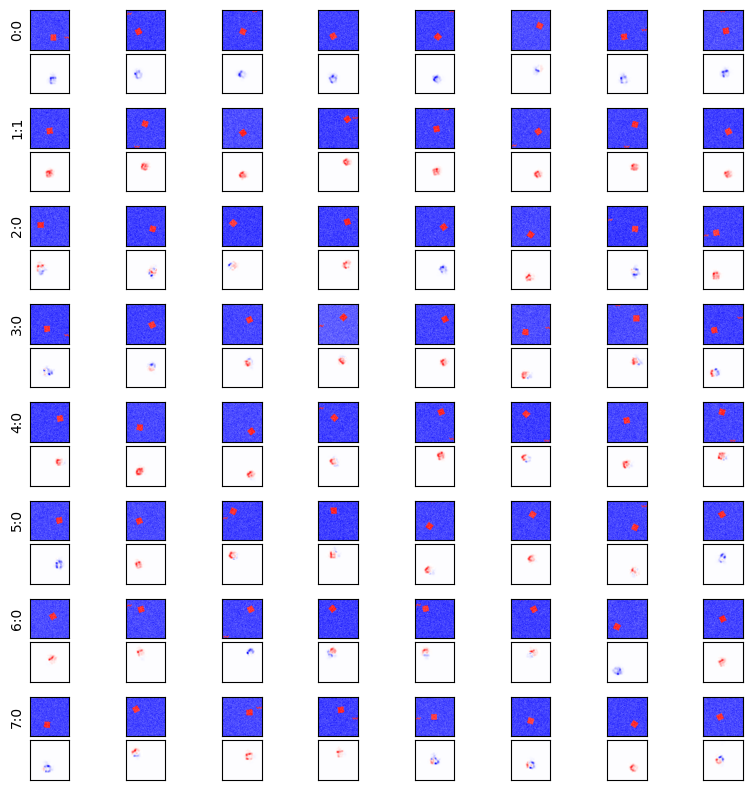

In [25]:
crp_attribution.make_all_relevances(LAYER_NAME, range(8))

In [1]:
L1  https://transformer-circuits.pub/2023/monosemantic-features

TCAV -> 

multipliziere activations in latent space mit basisvektoren 
https://arxiv.org/abs/2303.12641

SyntaxError: invalid syntax (911830306.py, line 1)